In [35]:
import pandas as pd
import numpy as np
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import re
from tqdm import tqdm

Convert file log to dataframe

In [36]:
file_log= r'D:\code-python\project_practice\server_log\0.log.20241201-211909\0.log.20241201-211909'

In [37]:
log_pattern= r'^\S+ (?P<std>\S+) \S+ (?P<remote_address>\d+\.\d+\.\d+\.\d+) - (?P<remote_user>[^ ]*) \[(?P<datetime>[^\]]+)\] "(?P<method>\w+) (?P<path>[^\s]+) (?P<header>[^\"]+)" (?P<status>\d+) (?P<bytes_sent>\d+) "(?P<referer>[^\"]*)" "(?P<user_agent>[^\"]*)"'

In [38]:
with open(file_log, 'r') as file:
    log_lines = file.readlines()

In [39]:
parsed_logs = [re.match(log_pattern, line).groupdict() for line in log_lines if re.match(log_pattern, line)]

In [40]:
df = pd.DataFrame(parsed_logs)

In [41]:
df.head()

,std,remote_address,remote_user,datetime,method,path,header,status,bytes_sent,referer,user_agent
0,stdout,127.0.0.1,-,30/Nov/2024:06:51:41 +0000,GET,/status,HTTP/1.1,200,1164,-,kong-ingress-controller/3.3.1
1,stderr,10.244.3.1,-,30/Nov/2024:06:51:42 +0000,GET,/status,HTTP/1.1,200,1165,-,kube-probe/1.27
2,stderr,10.244.3.1,-,30/Nov/2024:06:51:42 +0000,GET,/status/ready,HTTP/1.1,200,19,-,kube-probe/1.27
3,stdout,127.0.0.1,-,30/Nov/2024:06:51:44 +0000,GET,/status,HTTP/1.1,200,1164,-,kong-ingress-controller/3.3.1
4,stdout,127.0.0.1,-,30/Nov/2024:06:51:47 +0000,GET,/status,HTTP/1.1,200,1164,-,kong-ingress-controller/3.3.1


In [42]:
#df.to_csv('D:/code-python/project_practice/server_log/dataframe/server_log_convert_dataframe.csv')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66411 entries, 0 to 66410
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   std             66411 non-null  object
 1   remote_address  66411 non-null  object
 2   remote_user     66411 non-null  object
 3   datetime        66411 non-null  object
 4   method          66411 non-null  object
 5   path            66411 non-null  object
 6   header          66411 non-null  object
 7   status          66411 non-null  object
 8   bytes_sent      66411 non-null  object
 9   referer         66411 non-null  object
 10  user_agent      66411 non-null  object
dtypes: object(11)
memory usage: 5.6+ MB


Data Preprocessing

In [44]:
df['std'] = df['std'].replace({'stdout': 0, 'stderr': 1})

In [45]:
from datetime import datetime
df['datetime'] = df['datetime'].apply(lambda x: datetime.strptime(x, "%d/%b/%Y:%H:%M:%S %z"))

In [46]:
df = df.drop(['remote_user'], axis = 1)

In [47]:
df['method'] = df['method'].replace({'GET': 0, 'POST': 1})

In [48]:
df = df.drop(['header'], axis = 1)

In [49]:
df ['bytes_sent'] = pd.to_numeric(df['bytes_sent'])

In [50]:
df['status'] = pd.to_numeric(df['status'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66411 entries, 0 to 66410
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   std             66411 non-null  int64              
 1   remote_address  66411 non-null  object             
 2   datetime        66411 non-null  datetime64[ns, UTC]
 3   method          66411 non-null  int64              
 4   path            66411 non-null  object             
 5   status          66411 non-null  int64              
 6   bytes_sent      66411 non-null  int64              
 7   referer         66411 non-null  object             
 8   user_agent      66411 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(4), object(4)
memory usage: 4.6+ MB


In [51]:
df.isnull().sum()

std               0
remote_address    0
datetime          0
method            0
path              0
status            0
bytes_sent        0
referer           0
user_agent        0
dtype: int64

In [52]:
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['month'] = df['datetime'].dt.month

OneHotEncoder

In [53]:
from sklearn.preprocessing import OneHotEncoder

In [54]:
columns_encoder = ['remote_address', 'path', 'user_agent']

In [55]:
encoder = OneHotEncoder(sparse = False)
encoder_array = encoder.fit_transform(df[columns_encoder])

c:\Users\user\miniconda3\envs\test-env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [56]:
encoder_columns = encoder.get_feature_names_out(columns_encoder)

In [57]:
encoder_df = pd.DataFrame(encoder_array,columns = encoder_columns)

In [58]:
encoder_df.head()

,remote_address_10.244.2.197,remote_address_10.244.3.1,remote_address_10.244.3.105,remote_address_10.244.5.196,remote_address_113.191.208.122,remote_address_113.23.54.246,remote_address_116.103.226.203,remote_address_116.96.47.3,remote_address_117.4.31.86,remote_address_117.4.33.186,...,user_agent_VTHome_Dev/6 CFNetwork/1498.700.2 Darwin/23.6.0,user_agent_VTHome_Dev/6 CFNetwork/1568.200.51 Darwin/24.1.0,user_agent_curl/7.81.0,user_agent_kong-ingress-controller/3.3.1,user_agent_kube-probe/1.27,user_agent_lua-resty-http/0.06 (Lua) ngx_lua/10020,user_agent_okhttp/4.12.0,user_agent_okhttp/4.9.2,user_agent_otelcol-contrib/0.89.0,user_agent_python-requests/2.32.2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Embedding PCA

In [59]:
from sklearn.decomposition import PCA

In [60]:
pca = PCA(n_components=2)
embedding_data = pca.fit_transform(encoder_df)

In [61]:
embeding_df = pd.DataFrame(embedding_data, columns = ['Embedding1', 'Embedding2'])

In [62]:
df = pd.concat([df, embeding_df], axis =1)

In [70]:
df.head(3)

,std,remote_address,datetime,method,path,status,bytes_sent,referer,user_agent,day,hour,month,Embedding1,Embedding2
0,0,127.0.0.1,2024-11-30 06:51:41+00:00,0,/status,200,1164,-,kong-ingress-controller/3.3.1,30,6,11,-0.837709,-0.061207
1,1,10.244.3.1,2024-11-30 06:51:42+00:00,0,/status,200,1165,-,kube-probe/1.27,30,6,11,0.984510,-0.525195
2,1,10.244.3.1,2024-11-30 06:51:42+00:00,0,/status/ready,200,19,-,kube-probe/1.27,30,6,11,1.559433,-0.001141


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66411 entries, 0 to 66410
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   std             66411 non-null  int64              
 1   remote_address  66411 non-null  object             
 2   datetime        66411 non-null  datetime64[ns, UTC]
 3   method          66411 non-null  int64              
 4   path            66411 non-null  object             
 5   status          66411 non-null  int64              
 6   bytes_sent      66411 non-null  int64              
 7   referer         66411 non-null  object             
 8   user_agent      66411 non-null  object             
 9   day             66411 non-null  int32              
 10  hour            66411 non-null  int32              
 11  month           66411 non-null  int32              
 12  Embedding1      66411 non-null  float64            
 13  Embedding2      66411 non-null 

Visualization

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

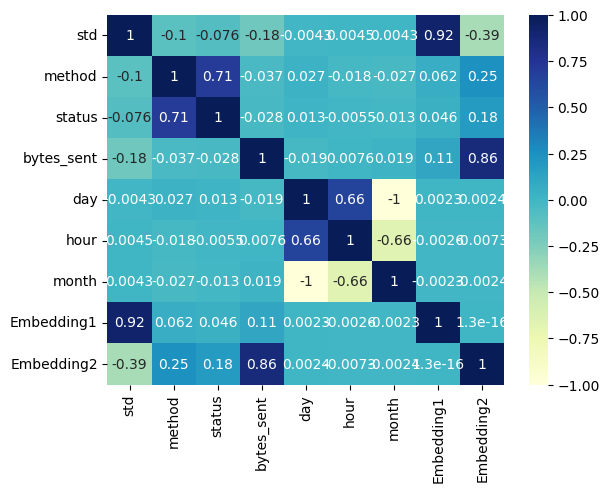

In [65]:
dataplot = sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

In [66]:
df.head(3)

,std,remote_address,datetime,method,path,status,bytes_sent,referer,user_agent,day,hour,month,Embedding1,Embedding2
0,0,127.0.0.1,2024-11-30 06:51:41+00:00,0,/status,200,1164,-,kong-ingress-controller/3.3.1,30,6,11,-0.837709,-0.061207
1,1,10.244.3.1,2024-11-30 06:51:42+00:00,0,/status,200,1165,-,kube-probe/1.27,30,6,11,0.984510,-0.525195
2,1,10.244.3.1,2024-11-30 06:51:42+00:00,0,/status/ready,200,19,-,kube-probe/1.27,30,6,11,1.559433,-0.001141


In [ ]:
#df.to_csv('D:/code-python/project_practice/server_log/dataframe/server_log_test.csv')